<a href="https://colab.research.google.com/github/GustGon/I.A.Python/blob/master/neural-network/nn-convulational/T2_Classificacao_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho #2 - Classificação de Múltiplas Classes

Nesse trabalho você vai desenvolver uma rede neural tipo densa usando a plataforma Keras para realizar uma tarefa de classificação de múltiplas classes.

A tarefa de classificação desse trabalho consiste na identificação de sinais de mão a partir de imagens. 

Essa mesma tarefa você vai realizar novamente no próximo trabalho mas usando uma rede neural tipo convolucional para verificar a diferença de desempenho das redes neurais tipo densa e convolucional para processar imagens. 

## Coloque os nomes e RAs dos alunos que fizeram esse trabalho

Nome e número dos alunos da equipe:

Aluno 1: Gustavo Gonçalves RA:19.83842-5

Aluno 2: 

Em primeiro lugar é necessário importar alguns pacotes do Python que serão usados nesse trabalho:
- [numpy](www.numpy.org) pacote de cálculo científico com Python
- [matplotlib](http://matplotlib.org) biblioteca para gerar gráficos em Python
- utils.py função para ler banco de dados 

In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

## 1 - Visão geral do problema ##

**Definição do problema**: 

O objetivo desse problema é desenvolver uma RNA que recebe como entrada uma imagem de sinais de mão e avalia a probabilidade dos dedos da mão mostrarem um número de 0 a 5 e determina qual o número mais provável entre os seis possíveis.

O banco de dados usado nesse trabalho é SIGNS, que consiste de imagens de sinais de mão criado por Andre Ng. Esse banco de dados pode ser obtido no link: https://github.com/cs230-stanford/cs230-code-examples/tree/master/tensorflow/vision

O banco de dados possui 1080 exemplos de treinamento e 120 exemplos de teste. Cada exemplo consiste de uma imagem colorida associada a um rótulo de 6 classes. A Figura 1 abaixo mostra alguns exemplos dessas imagens.


<img src="SIGNS.png" style="width:800px;height:300px;">

## 2 - Dados de treinamento

Os dados que iremos utilizar nesse trabalho estão nos arquivos train_signs.h5 e test_signs.h5.

Características dos dados:

- As imagens são coloridas e estão no padrão RGB;
- Cada imagem tem 64 pixels de altura e 64 pixels de largura;
- O valor da intensidade luminosa de cada cor é um número inteiro entre 0 e 255;
- As saídas representam o rótulo do sinal de mão mostrado na imagem, sendo um número inteiro de 0 a 5. 



### 2.1 - Leitura dos dados

Para iniciar o trabalho é necessário ler o arquivo de dados. Assim, execute o código da célula abaixo para ler o arquivo de dados.

In [0]:
# Leitura do arquivo de dados
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
print("X_train shape:", X_train_orig.shape, "y_train shape:", Y_train_orig.shape)
print("X_test shape:", X_test_orig.shape, "y_test shape:", Y_test_orig.shape)

X_train shape: (1080, 64, 64, 3) y_train shape: (1, 1080)
X_test shape: (120, 64, 64, 3) y_test shape: (1, 120)


Pela dimensão dos tensores com os dados de treinamento e teste temos:

- 1080 imagens de treinamento com dimensão de 64 por 64 por 3 pixels;
- 120 imagens de teste com dimensão de 64 por 64 por 3 pixels.


Execute a célula a seguir para visualizar um exemplo de uma imagem do banco de dados com a sua classe. Altere o valor da variável 'index' e execute a célula novamente para visualizar mais exemplos diferentes.

y = 4


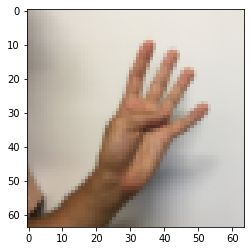

In [0]:
# Exemplo de uma imagem
index = 5
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

### 2.2 - Processamento dos dados

Para os dados poderem ser usados para o desenvolvimento da RNA devemos primeiramente processá-los.

Para isso devemos realizar as seguintes etapas:

- Dividir os dados de treinamento nos conjuntos de treinamento e validação;
- Os valores dos pixels em uma imagem é um número inteiro que deve ser transformado em número real para ser usado em cálculos;
- Redimensionar as imagens para transfroma-las em um vetor linha;
- Normalizar as imagens de forma que os valores dos pixels fique entre 0 e 1.

### Exercício #1: Conjuntos de treinamento e validação

Na célula abaixo crie um código para para dividir o conjunto de treinamento nos conjuntos de treinamento e validação. Use 960 imagens para o conjunto de treinamento e 120 imagens para o conjunto de validação. Não se esqueça de separar também as classes.

Nessa célula também transponha os vetores das saídas dos dados de treinamento, validação e teste para que o primeiro eixo seja o dos exemplos e o segundo eixo o das classes.

In [0]:
# PARA VOCÊ FAZER: Divisão dos dados de treinamento em dados de treinamento e validação

# Dados de entrada
### COMECE AQUI ### (≈ 2 linhas)
X_train = X_train_orig[:960,:,:,:]
X_val = X_train_orig[:120,:,:,:]
### TERMINE AQUI ###

# Dados de saída
### COMECE AQUI ### (≈ 3 linhas)
Y_train = np.transpose(Y_train_orig[:,:960])
Y_val = np.transpose(Y_train_orig[:,:120])
Y_test = np.transpose(Y_train_orig[:,:120])
### TERMINE AQUI ###

print("Dimensão do tensor de dados de entrada de treinamento =", X_train.shape)
print("Dimensão do tensor de dados de entrada de validação =", X_val.shape)
print("Dimensão do tensor de dados de saída de treinamento =", Y_train.shape)
print("Dimensão do tensor de dados de saída de validação =", Y_val.shape)
print("Dimensão do tensor de dados de saída de test =", Y_test.shape)

Dimensão do tensor de dados de entrada de treinamento = (960, 64, 64, 3)
Dimensão do tensor de dados de entrada de validação = (120, 64, 64, 3)
Dimensão do tensor de dados de saída de treinamento = (960, 1)
Dimensão do tensor de dados de saída de validação = (120, 1)
Dimensão do tensor de dados de saída de test = (120, 1)


**Saída esperada:**

<dd>Dimensão do tensor de dados de entrada de treinamento = (960, 64, 64, 3)<dd>Dimensão do tensor de dados de entrada de validação = (120, 64, 64, 3)<dd>Dimensão do tensor de dados de saída de treinamento = (960, 1)<dd>
Dimensão do tensor de dados de saída de validação = (120, 1)<dd>Dimensão do tensor de dados de saída de test = (120, 1)

### Exercício #2: Normalização e redimensionameto dos dados de entrada

Na célula abaixo crie um código para normalizar e transformar as imagens em números reais, dividindo por 255. Após essa operação, redimensionar os dados de entrada para ficarem na forma de vetor linha de dimensão num_px*num_px*3.

In [0]:
# PARA VOCÊ FAZER: Normalização dos dados de entrada

# Guarda dimensão das imagens
num_px = X_train.shape[1]
print("Numero de colunas e linhas das imagens de entrada=", num_px)

# Transformação dos dados em números reais
### Comece AQUI ### (≈ 3 linhas)
X_train_float = X_train/255
X_val_float = X_val/255
X_test_float = X_test_orig/255
### TERMINE AQUI ###

# Redimensionamento dos dados de entrada
### COMECE AQUI ### (≈ 6 linhas)
m_train = X_train.shape[0]
X_train_flat = X_train_float.reshape((X_train_float.shape[0],
                                                X_train_float.shape[1]*
                                                X_train_float.shape[2]*
                                                X_train_float.shape[3]))
m_test = X_test_orig.shape[1]
X_test_flat = X_test_float.reshape((X_test_float.shape[0],
                                                X_test_float.shape[1]*
                                                X_test_float.shape[2]*
                                                X_test_float.shape[3]))
m_val = X_val_float.shape[0]
X_val_flat = X_val_float.reshape((X_val_float.shape[0],
                                                X_val_float.shape[1]*
                                                X_val_float.shape[2]*
                                                X_val_float.shape[3]))
### TERMINE AQUI ###

print('Dimensão dos dados de entrada do conjunto de treinamento: ', X_train_flat.shape)
print('Dimensão dos dados de entrada do conjunto de validação: ', X_val_flat.shape)
print('Dimensão dos dados de entrada do conjunto de teste: ', X_test_flat.shape)

# Para verificar se os resultados estão corretos
print("Primeiros 5 elementos da primeira imagem de treinamento = ", X_train_flat[0,:5])
print("Primeiros 5 elementos da primeira imagem de validação = ", X_val_flat[0,:5])
print("Primeiros 5 elementos da primeira imagem de teste = ", X_test_flat[0,:5])

Numero de colunas e linhas das imagens de entrada= 64
Dimensão dos dados de entrada do conjunto de treinamento:  (960, 12288)
Dimensão dos dados de entrada do conjunto de validação:  (120, 12288)
Dimensão dos dados de entrada do conjunto de teste:  (120, 12288)
Primeiros 5 elementos da primeira imagem de treinamento =  [0.89019608 0.8627451  0.83921569 0.89019608 0.86666667]
Primeiros 5 elementos da primeira imagem de validação =  [0.89019608 0.8627451  0.83921569 0.89019608 0.86666667]
Primeiros 5 elementos da primeira imagem de teste =  [0.90588235 0.87843137 0.84705882 0.90980392 0.87843137]


**Saída esperada:**

<dd>Numero de colunas e linhas das imagens de entrada= 64<dd>Dimensão dos dados de entrada do conjunto de treinamento:  (960, 12288)<dd>Dimensão dos dados de entrada do conjunto de validação:  (120, 12288)<dd>Dimensão dos dados de entrada do conjunto de teste:  (120, 12288)<dd>Primeiros 5 elementos da primeira imagem de treinamento =  [0.8901961 0.8627451 0.8392157 0.8901961 0.8666667]<dd>Primeiros 5 elementos da primeira imagem de validação =  [0.8980392  0.85882354 0.8117647  0.89411765 0.85882354]<dd>Primeiros 5 elementos da primeira imagem de teste =  [0.90588236 0.8784314  0.84705883 0.9098039  0.8784314 ]

### Exercício #3: Codificação das classes

As classes dos sinais são identificadas por um número inteiro que varia de 0 a 5. Porém, a saída esperada de uma RNA para um problema de classificação de múltiplas classes é um vetor de dimensão igual ao número de classes, que no caso são 6 classes. Cada elemento desse vetor representa a probabilidade da imagem ser um sinal. Assim, devemos transformar as saídas reais do conjunto de dados em um vetor linha de 6 elementos, com todos os elementos iguais a zero a menos do correspondente ao da classe do sinal, que deve ser igual a um.

A função que realiza essa transformação é conhecida na literatura de “one-hot-encoding”, que no Keras é chamada de to_categorical. Essa função pertence à classe de utilidades do Keras que deve ser importada antes de ser utilizada. 

Implemente na célula abaixo a transformação dos dados de saída usando a função to_categorical do keras.

In [0]:
# PARA VOCÊ FAZER: Coficação das classes dos exemplos 

# Importa classe de utilidades do Keras
from keras.utils.np_utils import to_categorical

# Transformação das classes de números reais para vetores
### COMECE AQUI ### (≈ 3 linhas)
Y_train_hot = to_categorical(Y_train)
Y_val_hot = to_categorical(Y_val)
Y_test_hot = to_categorical(Y_test)
### Termine AQUI ###

print('Dimensão dos dados de saída do conjunto de treinamento: ', Y_train_hot.shape)
print('Dimensão dos dados de saída do conjunto de validação: ', Y_val_hot.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', Y_test_hot.shape)

# Para verificar se os resultados estão corretos
print("Primeiras 5 saídas dos exemplos de treinamento = ", Y_train_hot[:5,:])
print("Primeiras 5 saídas dos exemplos de validação = ", Y_val_hot[:5,:])
print("Primeiras 5 saídas dos exemplos de teste = ", Y_test_hot[:5,:])

Using TensorFlow backend.


Dimensão dos dados de saída do conjunto de treinamento:  (960, 6)
Dimensão dos dados de saída do conjunto de validação:  (120, 6)
Dimensão dos dados de saída do conjunto de teste:  (120, 6)
Primeiras 5 saídas dos exemplos de treinamento =  [[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]
Primeiras 5 saídas dos exemplos de validação =  [[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]
Primeiras 5 saídas dos exemplos de teste =  [[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]


**Saída esperada:**

<dd>Dimensão dos dados de saída do conjunto de treinamento:  (960, 6)<dd>Dimensão dos dados de saída do conjunto de validação:  (120, 6)<dd>Dimensão dos dados de saída do conjunto de teste:  (120, 6)<dd>Primeiras 5 saídas dos exemplos de treinamento =  [[0. 0. 0. 0. 0. 1.]<dd>[1. 0. 0. 0. 0. 0.]<dd>[0. 0. 1. 0. 0. 0.]<dd>[0. 0. 0. 0. 0. 1.]<dd> [0. 0. 1. 0. 0. 0.]]<dd>Primeiras 5 saídas dos exemplos de validação =  [[0. 1. 0. 0. 0. 0.]<dd>[0. 0. 0. 0. 0. 1.]<dd>[0. 0. 0. 0. 1. 0.]<dd>[0. 0. 0. 0. 0. 1.]<dd>[0. 0. 0. 1. 0. 0.]]<dd>Primeiras 5 saídas dos exemplos de teste =  [[1. 0. 0. 0. 0. 0.]<dd>[1. 0. 0. 0. 0. 0.]<dd>[1. 0. 0. 0. 0. 0.]<dd>[0. 0. 0. 0. 0. 1.]<dd>[0. 1. 0. 0. 0. 0.]]
   

**Visualização da entrada e saída correspondente**

Execute a célula abaixo para verificar se o seu programa está realizando de fato o que você espera. No código abaixo index é o número sequencial da imagem. Tente trocar a imagem, mudando a variável index, usando valores entre 0 e 959, para visualizar outros exemplos.

Classe numérica:  [3] , Vetor de saída correspondentes:  [0. 0. 0. 1. 0. 0.]


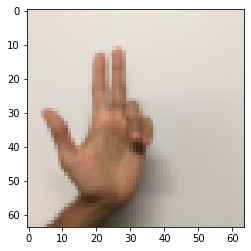

In [0]:
# Exemplo de saída
index = 564
print("Classe numérica: ", Y_train[index], ", Vetor de saída correspondentes: ", Y_train_hot[index])
plt.imshow(X_train_orig[index], cmap='gray', vmin=0, vmax=255)

**Saída esperada:**

<dd>Classe numérica:  [3] , Vetor de saída correspondentes:  [0. 0. 0. 1. 0. 0.]<dd>

## 3 - RNA

Nesse trabalho você irá usar uma RNA com camadas do tipo densas e com isso poderá verificar a dificuldade de realizar essa tarefa de classificação com esse tipo de RNA.

### Exercício #4: Criação e configuração da RNA

Você vai usar uma RNA com 2 camadas intermediárias e uma camada de saída com as seguintes características:

- Primeira camada: número de neurônios n1, função de ativação ReLu;
- Segunda camada: número de neurônios n2, função de ativação ReLu;
- Camada de saída: número de neurônio n3, função de ativação softmax.

Na célula abaixo crie uma função que recebe a dimensão dos dados de entrada e os números de neurônios das 3 camadas e configura a RNA de acordo com as características acima.

In [0]:
# PARA VOCÊ FAZER: Função para configuração da RNA

# Importa classes do Keras de modelos e camadas
from keras import models
from keras import layers

def build_model(data_shape, n1, n2, n3):
    """
    Essa função configura uma rede neural deep-learnig
    
    Argumentos:
    data_shape = tuple com dimensões dos dados de entrada da rede
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da camada de saída
       
    Retorna: modelo da rede neural
    """
    model = models.Sequential()
    
    # Adicione as camadas em seu modelo de RNA
    #### COMECE AQUI ### (≈ 3 linhas)
    model.add(layers.Dense(units=n1, activation='relu', input_shape=data_shape))
    model.add(layers.Dense(units=n2, activation='relu'))
    model.add(layers.Dense(units=n3, activation='softmax'))
    ### TERMINE AQUI ###
    
    return model

Defina os números de neurônios das camadas intermediárias e de saída e crie a RNA usando a função build_model criada na célula anterior. Utilize n1 = 64, n2 = 32, n3 = 6. Após criar a RNA utilize o método summary para visualizar a sua rede.

In [0]:
# PARA VOCÊ FAZER: criação da RNA

# Dimensão dos dados de entrada
#### COMECE AQUI ### (≈ 1 linhas) 
data_shape = (X_train_flat.shape[1],)
### TERMINE AQUI ###

# Definição dos números de neurônios das camadas
#### COMECE AQUI ### (≈ 3 linhas)
n1 = 64
n2 = 32
n3 = 6
### TERMINE AQUI ###

# Cria rede neural deep learning e apresenta sua configuração
#### COMECE AQUI ### (≈ 2 linhas)
rna0 = build_model(data_shape, n1, n2, n3)
rna0.summary()
### TERMINE AQUI ###





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 788,774
Trainable params: 788,774
Non-trainable params: 0
_________________________________________________________________


**Saída esperada:**

<dd>Layer (type) Output Shape Param #<dd>=================================================================<dd>dense_1 (Dense) (None, 64) 786496<dd>dense_2 (Dense) (None, 32) 2080<dd>dense_3 (Dense) (None, 6)  198<dd>=================================================================<dd>Total params: 788,774<dd>Trainable params: 788,774<dd>Non-trainable params: 0

### Exercício #5: Compilação e treinamento da RNA

Agora você vai treinar a sua RNA usando o método de otimização do gradiente descendente com momento. Assim, na célula abaixo, compile e treine a sua RNA usando os seguinte hiperparâmetros:

- taxa de aprendizado = 0,001;
- constante beta = 0,9;
- decay = 0;
- nesterov = True
- batch_size = 120;
- número de épocas = 600.

**Importante:** Escolha o parâmetro verbose=0 no método fit para evitar de imprimir os resultados das 600 épocas de treinamento.

In [0]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA usando o método do gradiente descendente com momento

# importa do keras a classe dos otimizadores
from keras import optimizers

# Reinicializa o gerador de números aleatórios
np.random.seed(1)

# Configuração do otimizador e compilação da RNA
### COMECE AQUI ### (≈ 2 linhas)
mom = optimizers.SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=True)
rna0.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=mom)
### TERMINE AQUI ###

# Treinamento da RNA
### COMECE AQUI ### (≈ 1 linha)
history = rna0.fit(X_train_flat, Y_train_hot, epochs=600, verbose=0, batch_size=120, validation_data=(X_val_flat, Y_val_hot))
### TERMINE AQUI ###



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

{'val_loss': [1.7750325202941895, 1.7229629755020142, 1.6777840852737427, 1.619226098060608, 1.5789202451705933, 1.520328402519226, 1.475919485092163, 1.4302340745925903, 1.3755754232406616, 1.4507410526275635, 1.3640152215957642, 1.292195200920105, 1.2776283025741577, 1.3067049980163574, 1.2358671426773071, 1.1779600381851196, 1.1291364431381226, 1.12864351272583, 1.0763767957687378, 1.0267682075500488, 0.9983548521995544, 1.0272372961044312, 0.9715663194656372, 1.0630892515182495, 0.8920257091522217, 0.8969568610191345, 0.9069963097572327, 0.8584563136100769, 0.8887745141983032, 0.8184078335762024, 0.7953516840934753, 0.7899266481399536, 0.7604733109474182, 0.7471582889556885, 0.8404977321624756, 0.7526524662971497, 0.7212631106376648, 0.8784289956092834, 0.6930961608886719, 0.7888676524162292, 0.7293986082077026, 0.6709840893745422, 0.7555332183837891, 0.670396089553833, 0.6394472122192383, 0.6540104150772095, 0.6306933760643005, 0.6768820285797119, 0.6815424561500549, 0.62043851613

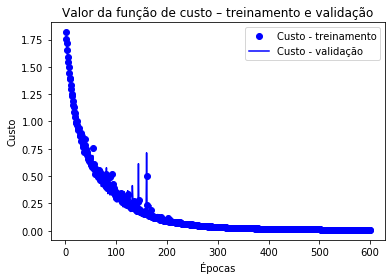

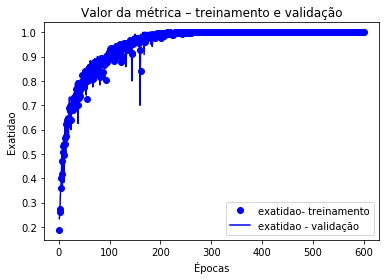

In [0]:
# Salva treinamento na variável history para visualização
history_dict = history.history
print(history_dict)

# Salva custos, métricas e epocas em vetores 
custo = history_dict['loss']
acc = history_dict['acc']
val_custo = history_dict['val_loss']
val_acc = history_dict['val_acc']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'bo', label='Custo - treinamento')
plt.plot(epocas, val_custo, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'bo', label='exatidao- treinamento')
plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

Execute a célula a seguir para calcular o custo e a exatidão para os dados de treinamento, validação e teste.

In [0]:
# Usando o método evaluate calcula o custo e a exatidão e depois apresenta os resultados
custo_e_metricas_train = rna0.evaluate(X_train_flat, Y_train_hot)
custo_e_metricas_val = rna0.evaluate(X_val_flat, Y_val_hot)
custo_e_metricas_test = rna0.evaluate(X_test_flat, Y_test_hot)

print(custo_e_metricas_train)
print(custo_e_metricas_val)
print(custo_e_metricas_test)

120/120 [==============================] - 0s 109us/step
[0.008157358807511627, 1.0]
[0.008024041137347619, 1.0]
[8.109947204589844, 0.18333333233992258]


**Exemplo de saída esperada:**

<dd>[0.00866352020141979, 1.0]<dd>[0.5716910809278488, 0.849999996026357]<dd>[0.41292793353398644, 0.8583333333333333]

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- O valor do custo para os dados de treinamento diminui constantemente ao longo do treinamento e estabiliza em um valor de cerca de 0,01.
- O valor do custo para os dados de validação diminui até por volta da época 200 e depois aumenta levemente e estabiliza em um valor de cerca de 0,6, o que representa um resultado ruim.
- A exatidão obtida para os dados de treinamento é de 100%, para os dados de validação e teste é de cerca de 85%.

O grafico da função de custo durante o treinamento e os valores obtidos para a função de custo e para a métrica no final do treinamento mostram claramente que está ocorrendo overfitting dos dados de treinamento.

## 4 - Dropout

Como temos uma RNA que está realizando "overfitting", então vamos usar dropout para tentar reduzir o "overfitting" e obter uma RNA que apresenta bom desempenho para os dados de teste. 

### Exercício #6: Criação e configuração da RNA com "dropout"

Crie a função build_model_Dp, modificando a sua função build_model para incluir o "dropout". 

Utilize novamente a mesma configuração da RNA, ou seja, 2 camadas intermediárias e uma camada de saída com as seguintes características:

- Primeira camada: número de neurônios n1, função de ativação ReLu;
- Segunda camada: número de neurônios n2, função de ativação ReLu;
- Camada de saída: número de neurônio n3, função de ativação sigmóide;
- Inclua "dropout" nas duas camadas intermediárias.

Essa função deve receber como entrada a dimensão dos dados de entrada, os números de neurônios das 3 camadas, a fração dos neurônios da camada 1 que devem ser desligados e a fração de neurônios da camada 2 que devem ser desligados. 

In [0]:
# PARA VOCÊ FAZER: Função para configuração da RNA com "dropout"

# Importa classes do Keras de modelos e camadas
from keras import models
from keras import layers
from keras import regularizers
from keras.constraints import maxnorm

def build_model_Dp(data_shape, n1, n2, n3, fracao1, fracao2):
    """
    Essa função configura uma rede neural deep-learnig
    
    Argumentos:
    data_shape = tuple com dimensões dos dados de entrada da rede
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da camada de saída
    fracao1 = fração de neurônios desligados na camada 1
    fracao2 = fração de neurônios desligados na camada 2
       
    Retorna: modelo da rede neural
    """
    model = models.Sequential()
    
    # Adicione as camadas em seu modelo de RNA
    #### COMECE AQUI ### (≈ 5 linhas)
    model.add(layers.Dense(units=n1, activation='relu', input_shape=data_shape))
    model.add(layers.Dropout(fracao1))
    model.add(layers.Dense(units=n2, activation='relu', dropout=fracao1))
    model.add(layers.Dropout(fracao2))
    model.add(layers.Dense(units=n3, activation='sigmoid', dropout=fracao2))
    ### TERMINE AQUI ###

    return model

In [0]:
# PARA VOCÊ FAZER: criação e configuração da RNA com "dropout"

# Reinicializa o gerador de números aleatórios
np.random.seed(1)

# Cria rede neural deep learning com regularizaçõa L2 e apresenta sua configuração
#### COMECE AQUI ### (≈ 3 linhas)
f1 = 0.2
f2 = 0.2
rnaDp = build_model_Dp(data_shape=(12288,), n1=64, n2=32, n3=6, fracao1=f1, fracao2=f2)
### TERMINE AQUI ###
rnaDp.summary()

TypeError: ignored

**Saída esperada:**

<dd>Layer (type) Output Shape Param #<dd>==============================================================<dd>dense_4 (Dense) None, 64) 786496<dd>dropout_1 (Dropout) (None, 64) 0<dd>dense_5 (Dense) (None, 32) 2080<dd>dropout_2 (Dropout) (None, 32)  0<dd>dense_6 (Dense) (None, 6) 198<dd>==============================================================<dd>Total params: 788,774<dd>Trainable params: 788,774<dd>Non-trainable params: 0
   

### Exercício #7: compilação e treinamento da RNA com "dropout"

Agora você vai treinar a sua RNA com "dropout" da mesma forma que foi feita para a RNA anterior. Assim, na célula abaixo, compile e treine a sua RNA. Use os seguintes parâmetros para a sua RNA:

- Método de otimização: gradiente descendente com momento;
- Fração de neurônios desligados na camada 1 = valor entre 0,1 e 0,5;
- Fração de neurônios desligados na camada 2 = valor entre 0 e 0,2;
- taxa de aprendizado = 0,001
- constante beta = 0,9;
- decay = 0;
- nesterov = True
- batch_size = 120;
- número de épocas = 600.

Teste alguns valores para as frações de desligamento dos neurônios das duas camadas intermediárias até você obter uma métrica para os dados de teste da mesma ordem da métrica dos dados de treinamento.

**Importante:** Escolha o parâmetro verbose=0 no método fit para evitar de imprimir os resultados das 30.000 épocas de treinamento.

In [0]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA usando o método do gradiente descendente com momento

# importa do keras a classe dos otimizadores
from keras import optimizers

# Configuração do otomizador
### COMECE AQUI ### (≈ 2 linhas)
mom = optimizers.SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=True)
rnaDp.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=mom)
### TERMINE AQUI ###

# Treinamento da RNA
### COMECE AQUI ### (≈ 1 linha)
historyDp = rnaDp.fit(X_train_flat, Y_train_hot, epochs=600, verbose=0, batch_size=120, validation_data=(X_val_flat, Y_val_hot))
### TERMINE AQUI ###

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

In [0]:
# Salva treinamento na variável history para visualização
history_dictDp = historyDp.history

# Salva custos, métricas e epocas em vetores 
custoDp = history_dictDp['loss']
accDp = history_dictDp['acc']
val_custoDp = history_dictDp['val_loss']
val_accDp = history_dictDp['val_acc']

# Cria vetor de épocas
epocasDp = range(1, len(custoDp) + 1)

# Gráfico dos valores de custo
plt.plot(epocasDp, custoDp, 'bo', label='Custo - treinamento')
plt.plot(epocasDp, val_custoDp, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocasDp, accDp, 'bo', label='Exatidao- treinamento')
plt.plot(epocasDp, val_accDp, 'b', label='Exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Exatidao')
plt.legend()
plt.show()

Execute a célula a seguir para calcular o custo e a exatidão pra os dados de treinamento, validação e teste.

In [0]:
# Usando o método evaluate calcula o custo e a exatidão e depois apresenta os resultados
custo_e_metricas_trainDp = rnaDp.evaluate(X_train_flat, Y_train_hot)
custo_e_metricas_valDp = rnaDp.evaluate(X_val_flat, Y_val_hot)
custo_e_metricas_testDp = rnaDp.evaluate(X_test_flat, Y_test_hot)

print(custo_e_metricas_trainDp)
print(custo_e_metricas_valDp)
print(custo_e_metricas_testDp)

**Exemplo de saída esperada:**

<dd>[0.016283914974580208, 1.0]<dd>[0.40387439529101055, 0.899999996026357]<dd>[0.34507068395614626, 0.900000003973643]

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- O valor do custo para os dados de treinamento e de validação apresentam agora um comportamento semelhante, sendo que ambos caem durante o treinamento, mas o custo dos dados de validação diminui menos do que o dos dados de treinamento.
- A exatidão obtida para os dados de treinamento é de cerca de 100%, para os dados de validação e de teste é de cerca de 90%.

Observa-se que o problema de "overfitting" está minimizado e a exatidão dos dados de teste apresenta um resultado melhor do que no caso da RNA sem dropout.

### Exercício #8: Verificação dos resultados

Na célula abaixo calcule a previsões da sua RNA com dropout para as imagens dos dados de teste e depois verifique se algumas dessas previsões estão corretas. 

Note que a previsão da RNA é um vetor de 6 elementos com as probabilidades da imagem mostrar os seis sinais. Para detereminar a classe prevista deve-se transformar esse vetor em um número inteiro de 0 a 5, que representa o sinal sendo mostrado. Para fazer essa transformação use a função numpy argmax(Y_test, axis=?), onde Y_test é o tensor com as saídas previstas pela RNA. Em qual eixo você deve calcular o índice da maior probabilidade?

Troque a variável index (variando entre 0 e 119) para verificar se a sua RNA consegue classificar corretamente o sinal de mão mostrado nas imagens.

In [0]:
# PARA VOCÊ FAZER: cálculo das classes previstas pela RNA com dropout

# Calculo das previsões da RNA
### COMECE AQUI ### (≈ 1 linha)
Y_test = Y_test_hot
### TERMINE AQUI ###

# Cálculo das classes previstas
### COMECE AQUI ### (≈ 1 linha)
classe = np.argmax(Y_test, axis=1)
### TERMINE AQUI ###

# Exemplo de uma imagem dos dados de teste
index = 51
plt.imshow(X_test_orig[index])
print ("y = " + str(np.squeeze(classe[index])))

**Saída esperada:**

y = 1

<img src="Teste.png">

## 9 - Conclusão

**Em resumo os resultados esperados para sua RNA são:**

<table> 
    <tr>
        <td>
        RNA
        </td>
        <td>
        Exatidão dos dados de treinamento
        </td>
        <td>
        Exatidão dos dados de validação
        </td>
        <td>
        Exatidão dos dados de testes
        </td>

   </tr>
        <td>
        RNA base
        </td>
        <td>
        100%
        </td>
        <td>
        85%
        </td>
        <td>
        85%
        </td>
    <tr>
        <td>
        RNA com dropout
        </td>
        <td>
        100%
        </td>
        <td>
        90%
        </td>
        <td>
        90%
        </td>
    </tr>
</table> 

Uma das conclusões desse trabalho é a mesma do Trabalho #5 de regularização, ou seja, dropout minimiza problemas de overfitting permitindo obter um melhor desempenho da RNA nos dados de teste. Mas como você deve ter percebido, ajustar as frações de desligamento do dropout até obter um desempenho satisfatório com os dados de teste não é uma tarefa fácil.

Outra conclusão é que essa RNA com camadas densas possui quase 800.000 parâmetros para realizar uma tarefa simples de classificação de múltiplas classes em imagens. Esse número de parâmetros é muito grande para essa tarefa que não é muito complexa. Se tivéssemos usado imagens com dimensões maiores o número de paâmetros seria muito maior. Além disso, observa-se que quanto maior o número de parâmetros de uma RNA mais difícil é o seu treinamento e maiores são os problemas de overfitting